# <center><font color="red"> https://bit.ly/ptpjb-2021-14</font>
# <center><font color="blue">14 - Deep Learning ~ LSTM</font>

<center><img alt="" src="images/cover_ptpjb_2021.png"/></center> 

## <center><font color="blue">tau-data Indonesia</font><br>(C) Taufik Sutanto - 2021</center>
<center><a href="https://tau-data.id">https://tau-data.id</a> ~ <a href="mailto:taufik@tau-data.id">taufik@tau-data.id</a></center>

# Long Short Term Memory (LSTM)
<br>
<table><tr>
    <td> <img src="images/handwriting.png" width="300" align = left/> </td>
    <td> <img src="images/speech recognition.jpg" width="300" align = left/> </td>
    <td> <img src="images/anomaly detection.png" width="300" align = left/> </td>
</tr></table>
<br>
Long short-term memory (LSTM) adalah arsitektur Recurrent Neural Network (RNN) yang digunakan pada bidang deep learning. Tidak seperti feed forward neural network biasa, LSTM memiliki koneksi umpan balik sehingga LSTM dapat memproses tidak hanya data tunggal (seperti gambar), tetapi juga seluruh urutan data (seperti ucapan atau video). LSTM mampu melakukan tugas-tugas seperti handwriting recognition, speech recognition dan anomaly detection pada network traffic atau IDSs (intrusion detection systems).

# Feed-forward Neural Network Vs Recurrent Neural Network
<img src="images/Comparison-of-FFNN-and-RNN.png" />

image source: https://www.researchgate.net/figure/Comparison-of-FFNN-and-RNN_fig1_320944634

- **Arsitektur FFNN hanya menjadikan input sebagai kombinasi linear dan dimasukan ke fungsi aktivasi**
- **Input pada arsitektur RNN adalah data sekuensial sehingga tidak tepat jika dijadikan sebagai kombinasi linear**
- **Saat unit RNN dibentangkan, kita akan melihat node-node RNN yang disebut dengan blok RNN**
- **Blok RNN ini berfungsi untuk mengalirkan informasi dari data urutan pertama hingga terakhir, sehingga output tiap-tiap bloknya akan bergantung pada data di blok tersebut dan seluruh data pada blok sebelumnya**

# Perhatikan Data Berikut

<img src="images/data_rnn.jpg"/>

## - FFNN
<img src="images/data_ffnn.jpg" width="800"/>

## - RNN
<img src="images/data_rnn1.jpg" width="800"/>

# Blok RNN

- Di dalam blok RNN terdapat fungsi aktivasi tanh yang memaksa nilai outputnya berada di interval -1 dan 1

<img src="images/rnn.jpg" width="800" />



# Arsitektur RNN

<img src="images/rnn_vs_ffn.png" width="600" />

### - 1 hidden layer dengan 1 unit RNN

<img src="images/rnn_layer1.jpg" width="800" />

### - 1 hidden layer dengan 2 unit RNN

<img src="images/rnn_layer2.jpg" width="800" />

### - 2 hidden layer dengan 1 unit RNN

<img src="images/rnn_layer3.jpg" width="600" />

### - Hidden layer 1 dengan 2 unit RNN dan hidden layer 2 dengan 2 unit RNN

<img src="images/rnn_layer4.jpg" width="600" />


# LSTM Vs RNN
<img src="images/ilustrasi_review_lstm.jpg"/>

<img src="images/RNN VS LSTM.jpg"/>

- Cara kerja LSTM
<img src="images/forget gate.gif" width="700" />
<img src="images/input gate.gif" width=700 />
<img src="images/cell state.gif" width=700 />
<img src="images/output gate.gif" width=700 />

image source:https://www.megabagus.id/deep-learning-recurrent-neural-networks/4/

# LSTM for forecasting

- Misalkan kita memiliki data time series sebagai berikut:
<img src="images/time_series_data.jpg" width=250 />

- Untuk melakukan forecasting menggunakan LSTM pada data tersebut, hal yang perlu dilakukan adalah menjadikan data tersebut menjadi data sekuensial menggunakan sliding window.

- Sliding Window: Misalkan window size = w, data ke $t$ diprediksi dengan melihat w data sebelumnya.

- Sebagai ilustrasi, perhatikan animasi berikut:
<img src="images/sliding window.gif" width=700 />

- Apabila kita memilih window size = 5, setelah dilakukan sliding window pada data time series yang diperlihatkan di awal, maka akan kita dapatkan data sebagai berikut:
<img src="images/sekuensial_data.jpg" width=250 />

# Studi Kasus
Sebagai contoh kita akan membuat model forecasting sederhana dengan menggunakan dataset 

**"Hourly Energy Consumption: Over 10 years of hourly energy consumption data from PJM in Megawatts"**

PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.

The hourly power consumption data comes from PJM's website and are in megawatts (MW).

The regions have changed over the years so data may only appear for certain dates per region.

Source: https://www.kaggle.com/robikscube/hourly-energy-consumption

Terdapat 14 data pada dataset tersebut. yang digunakan pada contoh ini adalah data AEP_hourly.csv yaitu data konsumsi energi dari American Electric Power (AEP) dalam satuan megawatt (MW)

<img src="images/AEP_logo.png" width=400 />

## Import Modul Standar

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

# Mempersiapkan Data

## Import Data Konsumsi Energi dari American Electric Power (AEP)

- Data konsumsi energi dari American Electric Power (AEP) diimport menggunakan pandas
- Karena format datanya csv maka untuk mengimportnya menggunakan `pd.read_csv()`
- Setelah diimport dan simpan dalam variabel df, kita coba lihat 10 data teratas menggunakan `df.head()`

In [107]:
df = pd.read_csv('data/AEP_hourly.csv')
df.head(10)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
5,2004-12-31 06:00:00,13038.0
6,2004-12-31 07:00:00,13692.0
7,2004-12-31 08:00:00,14297.0
8,2004-12-31 09:00:00,14719.0
9,2004-12-31 10:00:00,14941.0


### Melihat informasi singkat dari dataframe

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


- Dari informasi singkat di atas, kita dapat mengetahui bahwa df terdiri dari 121273 baris. 
- Selain itu, pada kolom Datetime, tipe datanya masih berupa object (string) sehingga perlu diubah menjadi tipe data datetime dengan cara berikut.

In [109]:
# merubah tipe data object to datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])

# melihat tipe data dataframe
print(df.dtypes)

Datetime    datetime64[ns]
AEP_MW             float64
dtype: object


### Perhatikan waktu terawal dari kolom Datetime dan 5 data teratas dari df

In [110]:
print('waktu terawal dari kolom Datetime adalah:', df['Datetime'].min())
df.head()

waktu terawal dari kolom Datetime adalah: 2004-10-01 01:00:00


,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


- Dapat kita lihat bahwa waktu pada baris pertama dari kolom tidak sama dengan waktu terawalnya. 
- Maka dari itu perlu kita urutkan df berdasarkan Datetime menggunakan `df.sort_values()`.
- Kemudian kita juga dapat menjadikan kolom Datetime menjadi index df menggunakan `df.set_index()`.

In [111]:
# mengurutkan data berdasarkan waktu
df.sort_values('Datetime', inplace=True)

# menjadikan kolom 'Month' sebagai index
df.set_index('Datetime', inplace=True)
df.head()

,AEP_MW
Datetime,
2004-10-01 01:00:00,12379.0
2004-10-01 02:00:00,11935.0
2004-10-01 03:00:00,11692.0
2004-10-01 04:00:00,11597.0
2004-10-01 05:00:00,11681.0


### Plot Data df

<AxesSubplot:xlabel='Datetime', ylabel='AEP_MW'>

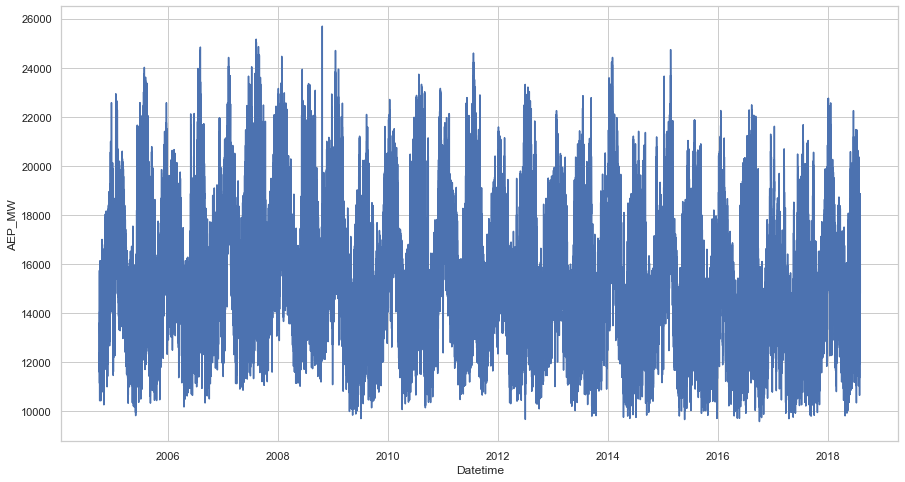

In [112]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df.index, y=df['AEP_MW'])

## Memilih Data Setahun Terakhir
- Pada contoh ini kita hanya akan gunakan data setahun terakhir dari data AEP_hourly
- Karena data yang diobservasi per jam, maka kita akan mengambil 24*365=8760 baris terakhir dari df dan dimasukan kedalam variabel df1

In [113]:
df1 = df[-24*365:]
df1.head()

,AEP_MW
Datetime,
2017-08-03 01:00:00,13682.0
2017-08-03 02:00:00,12841.0
2017-08-03 03:00:00,12443.0
2017-08-03 04:00:00,12213.0
2017-08-03 05:00:00,12286.0


### Plot Data df1

<AxesSubplot:xlabel='Datetime', ylabel='AEP_MW'>

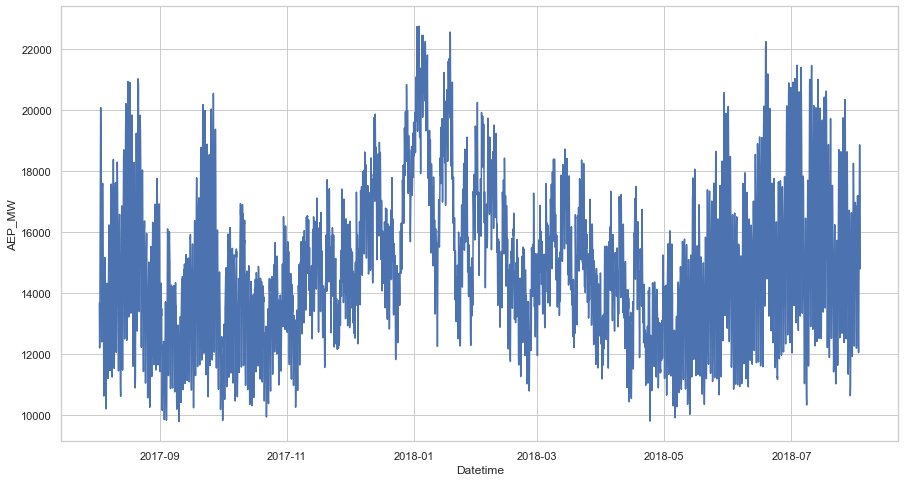

In [114]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df1.index, y=df1['AEP_MW'])

## Melihat Statistika Deskriptif dari Data
- Sebelum melakukan pembuatan model, sebaiknya dilakukan analisa terhadap statistika deskriptif dari data
- Dari statistika deskriptif tersebut, kita dapat meilhat range dari data dan ukuran pusat data

In [115]:
df1.describe()

,AEP_MW
count,8760.000000
mean,14963.130708
std,2438.848843
min,9801.000000
25%,13260.750000
50%,14721.500000
75%,16421.750000
max,22759.000000


- Dari statistika deskriptif di atas terlihat bahwa data AEP_MW cukup besar dan berada pada range 9801 dan 22759 sehingga nanti kita akan lakukan **feature scalling** menggunakan **MinMaxScaler** agar range dari seluruh data tersebut berada di antara 0 dan 1

## Split Data
<img src="images/cross_validation.png">

- Split data dilakukan agar model yang telah dilatih dapat dievaluasi kemampuannya.
- Karena data yang digunakan adalah data time series, maka split data tidak dilakukan secara acak
- Kita juga akan melakukan **cross validation** menggunakan data train sehingga pastikan data train yang digunakan cukup besar.
- Pada contoh ini kita gunakan 70% baris pertama sebagai data train dan 30% sisanya sebagai data test.

In [116]:
# split data
train_size = int(len(df1) * 0.7) # Menentukan banyaknya data train yaitu sebesar 70% data
train = df1[:train_size]
test =df1[train_size:]

## Feature Scalling Menggunakan MinMaxScaler
- MinMaxScaler difit pada data train agar dapat digunakan kembali pada data test maupun data observasi baru.
- Hasil scalling disimpan pada kolom baru yaitu `'scaled'`

In [117]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train[['AEP_MW']])

train['scaled'] = scaler.transform(train[['AEP_MW']])
test['scaled'] = scaler.transform(test[['AEP_MW']])

### Mari kita lihat 5 data pertama pada data train untuk melihat data yang sudah discalling

In [118]:
train.head()

,AEP_MW,scaled
Datetime,,
2017-08-03 01:00:00,13682.0,0.299506
2017-08-03 02:00:00,12841.0,0.234604
2017-08-03 03:00:00,12443.0,0.203889
2017-08-03 04:00:00,12213.0,0.186140
2017-08-03 05:00:00,12286.0,0.191773


## Membuat fungsi sliding window
- Selanjutnya kita akan membuat fungsi sliding window dengan input data (bertipe data numpy array) dan window size
- Fungsi ini akan menghasilkan variabel input (X) dan variabel target (y)

In [119]:
def sliding_window(data, window_size):
    sub_seq, next_values = [], []
    for i in range(len(data)-window_size):
        sub_seq.append(data[i:i+window_size])
        next_values.append(data[i+window_size])
    X = np.stack(sub_seq)
    y = np.array(next_values)
    return X,y

# Berapa window size yang tepat untuk digunakan?

- Pada penerapannya kita dapat menentukan window size berapa saja. 
- Untuk mencapai hasil yang maksimal dapat dilakukan percobaan dengan menggunakan beberapa window size. 
- Perlu diperhatikan juga bahwa semakin besar window size yang digunakan akan memerlukan waktu yang cukup lama dalam memproses data
- Pada contoh ini kita hanya menggunakan **window size = 24** atau sama dengan 1 hari dan kita terapkan pada data train dan test yang telah discalling

In [120]:
window_size = 24

X_train, y_train = sliding_window(train[['scaled']].values, window_size)
X_test, y_test = sliding_window(test[['scaled']].values, window_size)

# Penting!!! 
- Data input LSTM harus 3D : [samples, timesteps, feature]
- Maka dari itu kita perlu cek dimensi data kita menggunakan np.shape

In [121]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6108, 24, 1) (6108, 1)
(2604, 24, 1) (2604, 1)


# LSTM menggunakan Tensorflow dan Keras
- tensorflow: https://www.tensorflow.org/overview
- keras: https://keras.io/about/
<br><br>
- **LSTM()**, perhatikan parameter-parameter berikut untuk membuat LSTM layer sederhana seperti yang telah dijelaskan sebelumnya menggunakan Keras:
1. units: menentukan banyaknya LSTM unit
2. input_shape: menentukan ukuran timesteps dan feature, diperlukan pada layer pertama
3. return_sequences: jika layer berikutnya berupa LSTM layer maka return_sequences=True (default = False)

Paramaeter-parameter lainnya dapat dilihat pada link berikut: https://keras.io/api/layers/recurrent_layers/lstm/

## Membuat Model Forecasting Menggunakan LSTM
### 1. Import Modul

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

### 2. Membuat Fungsi Model Forecasting Menggunakan LSTM

Fungsi model yang akan dibuat terdiri:
- LSTM layer dengan input_shape = (window_size, 1)
- Dense layer dengan 32 neuron dengan fungsi aktivasi ReLu
- Dense output layer dengan 1 neuron
- loss function yang digunakan adalah Mean Squared Error (MSE)
- optimizer yang digunakan adalah adam
- metric yang digunakan adalah Mean Absolute Error (MAE)

Parameter-parameter yang dijadikan sebagai input dari fungsi tersebut adalah:
- LSTM_unit: banyaknya LSTM unit (default = 64)
- dropout: persentase dropout (default = 0.2)

In [140]:
def create_model(LSTM_unit=64, dropout=0.2):
    # create model
    model = Sequential()
    model.add(LSTM(units=LSTM_unit, input_shape=(window_size, 1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

### 3. Membuat Model

Kita coba lakukan hypertuning pada parameter berikut seperti yang dilakukan pada Modul ke 13:
- LSTM_unit = [16,32,64,128]
- dropout = [0.1,0.2]

Selain itu, kita juga gunakan early stopping pada saat proses training

In [4]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping

In [20]:
# Early Stopping
es = EarlyStopping(monitor = 'val_loss', mode = "min", patience = 5, verbose = 0)

# create model
model = KerasRegressor(build_fn=create_model, epochs=50, validation_split=0.1, batch_size=32, callbacks=[es], verbose=1)

# define the grid search parameters
LSTM_unit = [16,32,64,128]
dropout=[0.1,0.2]
param_grid = dict(LSTM_unit=LSTM_unit, dropout=dropout)

### 4. Membuat Variabel GridSearchCV
Variabel GridSearchCV dibuat dengan memasukan beberapa parameter yaitu:
- estimator: model yang ingin dilakukan gridsearch
- param_grid: parameter yang ingin diuji
- n_jobs: Jumlah pekerjaan untuk dijalankan secara paralel. (-1 artinya menggunakan seluruh core processor)
- cv: banyaknya k-fold cross validation

In [21]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)

### 5. Training Model dengan GridSearchCV

In [22]:
grid_result = grid.fit(X_train, y_train)

Epoch 1/50
185/185 [==============================] - 7s 25ms/step - loss: 0.0154 - mae: 0.0930 - val_loss: 0.0043 - val_mae: 0.0523
Epoch 2/50
185/185 [==============================] - 4s 22ms/step - loss: 0.0068 - mae: 0.0636 - val_loss: 0.0020 - val_mae: 0.0345
Epoch 3/50
185/185 [==============================] - 4s 22ms/step - loss: 0.0053 - mae: 0.0550 - val_loss: 0.0013 - val_mae: 0.0268
Epoch 4/50
185/185 [==============================] - 4s 23ms/step - loss: 0.0042 - mae: 0.0483 - val_loss: 0.0011 - val_mae: 0.0253
Epoch 5/50
185/185 [==============================] - 4s 24ms/step - loss: 0.0035 - mae: 0.0439 - val_loss: 0.0010 - val_mae: 0.0238
Epoch 6/50
185/185 [==============================] - 4s 22ms/step - loss: 0.0031 - mae: 0.0414 - val_loss: 9.3237e-04 - val_mae: 0.0225
Epoch 7/50
185/185 [==============================] - 4s 24ms/step - loss: 0.0026 - mae: 0.0376 - val_loss: 9.0710e-04 - val_mae: 0.0228
Epoch 8/50
185/185 [==============================] - 4s 24ms

### 6. Melihat Hasil Parameter Terbaik

In [23]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000433 using {'LSTM_unit': 128, 'dropout': 0.2}
-0.000433 (0.000088) with: {'LSTM_unit': 128, 'dropout': 0.2}


Dari Hasil Training menggunakan GridSearchCV, kita peroleh:
- parameter terbaiknya adalah: {'activation': 'relu', 'dropout': 0.3, 'neurons': 128}
- Rata-rata Loss Function dari hasil Cross Validation adalah 0.047091 

**Kemudian coba kita lihat grafik loss function MSE dan metric MAE terhadap epoch untuk melihat performa model terbaik kita dengan cara sebagai berikut**

In [24]:
history = grid_result.best_estimator_.model.history

Kita dapat melihat grafik loss function MSE dan metric MAE terhadap epoch untuk melihat performa model kita dengan cara sebagai berikut

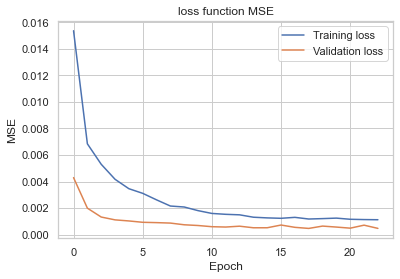

In [25]:
# grafik loss function MSE

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('loss function MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()

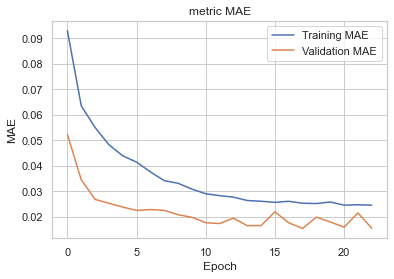

In [26]:
# grafik metric MAE

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('metric MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

### 7. Evaluasi Model

- Melakukan prediksi pada data train dan data test

In [28]:
best_model = grid_result.best_estimator_.model

In [29]:
# Prediksi data train
predict_train = scaler.inverse_transform(best_model.predict(X_train))
true_train = scaler.inverse_transform(y_train)

# Prediksi data test
predict_test = scaler.inverse_transform(best_model.predict(X_test))
true_test = scaler.inverse_transform(y_test)

- Setelah melakukan prediksi barulah kita melakukan evaluasi terhadap nilai prediksi tersebut menggunakan metric yang digunakan yaitu MAE

In [30]:
# Mean Absolute Error (MAE) data train
mae_train = np.mean(np.abs(true_train-predict_train))
print('MAE data train sebesar:', mae_train)

# Mean Absolute Error (MAE) test data
mae_test = np.mean(np.abs(true_test-predict_test))
print('MAE data test sebesar:', mae_test)

MAE data train sebesar: 196.81418056470554
MAE data test sebesar: 205.19318308878695


## Apakah Nilai MAE Tersebut Bagus???

**Melihat boxplot dari nilai error mutlak**

<AxesSubplot:>

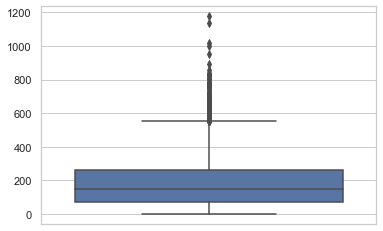

In [142]:
abs_error_train = np.abs(true_train-predict_train)
sns.boxplot(y=abs_error_train)

<AxesSubplot:>

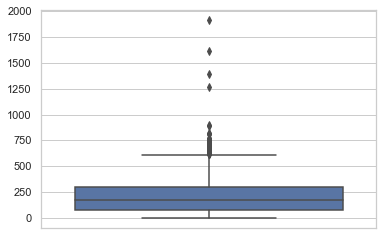

In [143]:
abs_error_test = np.abs(true_test-predict_test)
sns.boxplot(y=abs_error_test)

**Melihat range data**

In [33]:
print('interval data train', true_train.min(), 'dan', true_train.max())
print('interval data test', true_test.min(), 'dan', true_test.max())

interval y_train 9801.0 dan 22758.999999999996
interval y_test 9925.0 dan 22253.0


## Plot prediksi data train

<AxesSubplot:xlabel='Datetime', ylabel='AEP_MW'>

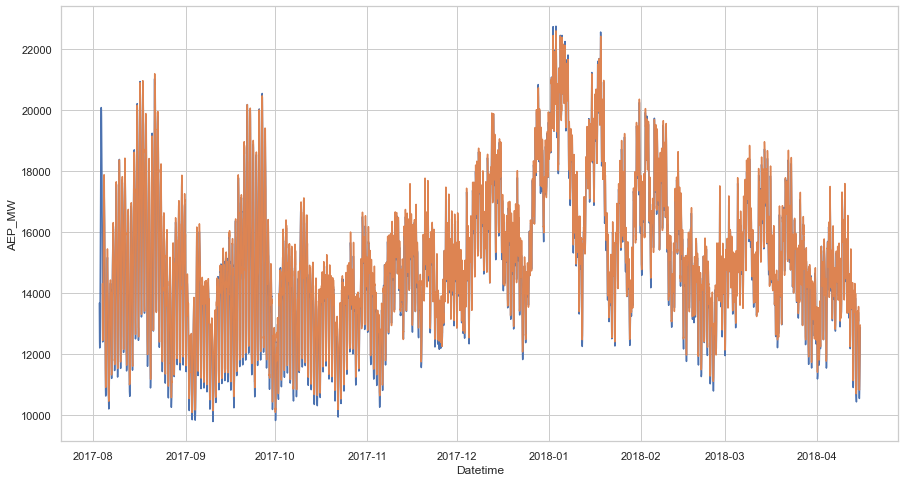

In [138]:
train['predict'] = np.nan
train['predict'][-len(predict_train):] = predict_train[:,0]

plt.figure(figsize=(15,8))
sns.lineplot(x=train.index, y=train.AEP_MW, label = 'train')
sns.lineplot(x=train.index, y=train.predict, label = 'predict')

## Plot prediksi data test

<AxesSubplot:xlabel='Datetime', ylabel='AEP_MW'>

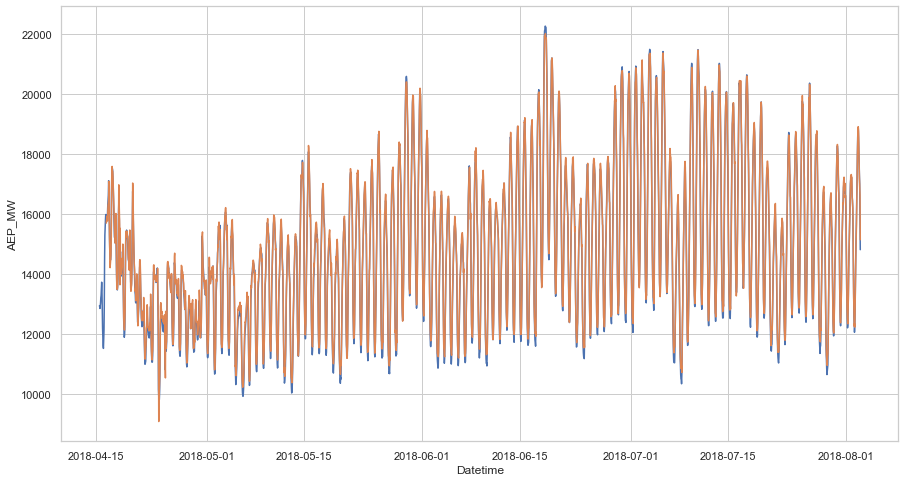

In [139]:
test['predict'] = np.nan
test['predict'][-len(predict_test):] = predict_test[:,0]

plt.figure(figsize=(15,8))
sns.lineplot(x=test.index, y=test.AEP_MW, label = 'test')
sns.lineplot(x=test.index, y=test.predict, label = 'predict')

## Plot prediksi data test sebulan terakhir

<AxesSubplot:xlabel='Datetime', ylabel='AEP_MW'>

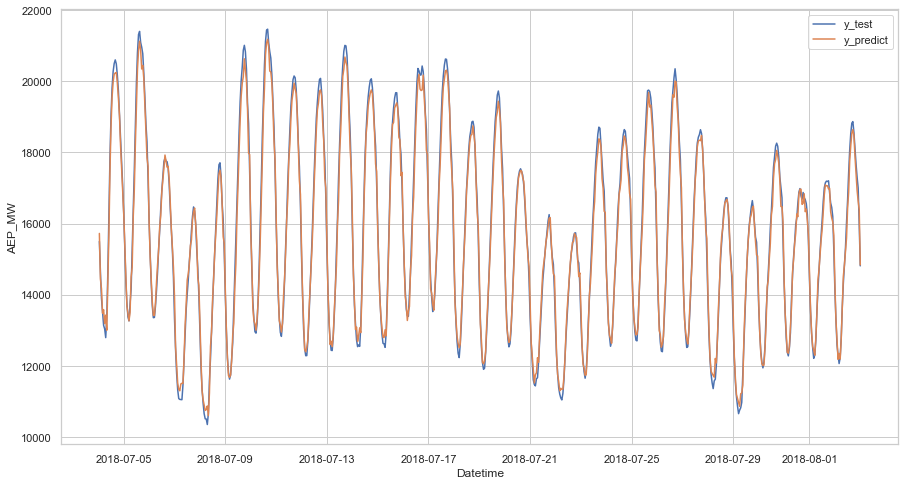

In [36]:
plt.figure(figsize=(15,8))
sns.lineplot(x=test[-24*30:].index, y=test[-24*30:].AEP_MW, label = 'test')
sns.lineplot(x=test[-24*30:].index, y=test[-24*30:].predict, label = 'predict')

**Melakukan forecasting**

In [38]:
# forecasting data selanjutnya
y_test = scaler.transform(test[['AEP_MW']])
n_future = 24*7
future = [[y_test[-1,0]]]
X_new = y_test[-window_size:,0].tolist()

for i in range(n_future):
    y_future = best_model.predict(np.array([X_new]).reshape(1,window_size,1))
    future.append([y_future[0,0]])
    X_new = X_new[1:]
    X_new.append(y_future[0,0])

future = scaler.inverse_transform(np.array(future))
date_future = pd.date_range(start=test.index[-1], periods=n_future+1, freq='H')

Text(0, 0.5, 'AEP_MW')

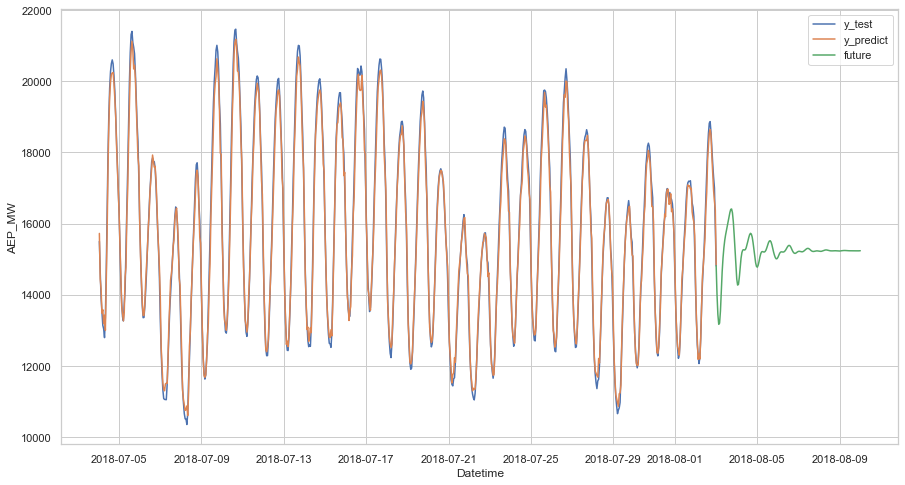

In [39]:
# Plot Data sebulan terakhir dan seminggu ke depan
plt.figure(figsize=(15,8))
sns.lineplot(x=test[-24*30:].index, y=test[-24*30:].AEP_MW, label = 'test')
sns.lineplot(x=test[-24*30:].index, y=test[-24*30:].predict, label = 'predict')
sns.lineplot(x=date_future, y=future[:,0], label = 'future')
plt.ylabel('AEP_MW');

# Deteksi Anomali

<img src="images/anomaly_detection.png"/>

- Model forecasting yang telah dibuat, dapat dikembangkan lagi untuk melakukan **deteksti anomali** dengan cara Unsupervised ataupun Supervised. 
- Namun untuk deteksi anomali secara supervised, anomali pada data time series yang diobservasi perlu ditandai dulu

Berikut adalah konsep dasar deteksi anomali secara unsupervised dan supervised:
- Unsupervised: 
1. Model forecasting dibuat menggunakan data train.
2. Lakukan prediksi pada data train untuk menghitung error mutlak.
3. Tentukan threshold (nilai batas) berdasarkan distribusi error mutlak dari data train.  
4. Kemudian lakukan prediksi pada data test.
5. Data test yang memiliki nilai error mutlak melebihi threshold tersebut akan diindikasikan sebagai anomali.
<br>
<br>
- Supervised: 
1. Model forecasting dibuat menggunakan data train.
2. Lakukan prediksi pada data test untuk menghitung error mutlak.
3. Misal terdapat *n* anomali pada data test, maka threshold dipilih dengan cara memilih nilai mutlak terbesar ke *n* pada data test.
4. Data test yang memiliki nilai error mutlak melebihi threshold tersebut akan diindikasikan sebagai anomali.

## Deteksi Anomali (Unsupervised)

- Kita akan melakukan deteksi anomali secara unsupervised dengan menggunakan model forecasting yang telah kita buat sebelumnya
- Karena kita telah menghitung nilai error mutlak pada data train dan data test, maka selanjutnya kita akan menentukan threshold
- Mari kita lakukan plot histogram pada error mutlak tersebut

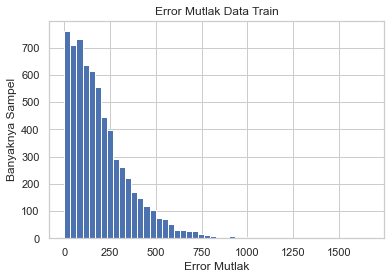

In [40]:
plt.hist(abs_error_train, bins=50)
plt.xlabel('Error Mutlak')
plt.ylabel('Banyaknya Sampel')
plt.title('Error Mutlak Data Train');

### Dari histogram tersebut dapat ditetapkan threshold = 750

In [50]:
threshold = 700
print(f'threshold error mutlak: {threshold}')

threshold error mutlak: 700


### Mari kita lihat  juga plot histogram error mutlak pada data test untuk melihat ketepatan pemilihan threshold

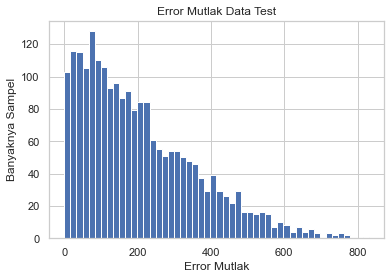

In [44]:
plt.hist(abs_error_test, bins=50)
plt.xlabel('Error Mutlak')
plt.ylabel('Banyaknya Sampel')
plt.title('Error Mutlak Data Test');

Terlihat bahwa threshold yang dipilih sudah cukup tepat

- Selanjutnya data test yang memiliki nilai error mutlak melebihi threshold tersebut akan diindikasikan sebagai anomali.
- Dan kita masukan ke dalam dataframe test_anomaly.

In [52]:
test_anomaly = pd.DataFrame()
test_anomaly['AEP_MW'] = test['AEP_MW'][window_size:]
test_anomaly['abs_error'] = abs_error_test
test_anomaly['anomaly_hat'] = 0
test_anomaly.loc[test_anomaly.abs_error >= threshold, 'anomaly_hat'] = 1
test_anomaly.index = test[window_size:].index

test_anomaly.head(10)

,AEP_MW,abs_error,anomaly_hat
Datetime,,,
2018-05-04 19:00:00,14470.0,105.437500,0
2018-05-04 20:00:00,13996.0,337.875000,0
2018-05-04 21:00:00,13973.0,311.639648,0
2018-05-04 22:00:00,13991.0,56.755859,0
2018-05-04 23:00:00,13164.0,764.047852,1
2018-05-05 00:00:00,12311.0,200.124023,0
2018-05-05 01:00:00,11352.0,445.067383,0
2018-05-05 02:00:00,10967.0,251.235352,0
2018-05-05 03:00:00,10566.0,322.672852,0


In [53]:
anomalies_pred = test_anomaly.loc[test_anomaly['anomaly_hat'] == 1]

In [5]:
# grafik data test beserta anomali
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=test_anomaly.index, y=test_anomaly['AEP_MW'], name='AEP_MW'))
fig.add_trace(go.Scatter(x=anomalies_pred.index, y=anomalies_pred['AEP_MW'], mode='markers', name='Anomaly Pred'))
fig.update_layout(showlegend=True, title='Detected anomalies')
fig.show()

## Deteksi Anomali (Supervised)

Untuk contoh deteksi anomali dengan cara supervised, kita akan gunakan data web traffic dari **Yahoo Webscope**

<img src="images/webscope.jpg" />

- The Yahoo Webscope Program is a reference library of interesting and scientifically useful datasets for non-commercial use by academics and other scientists.  
- All datasets have been reviewed to conform to Yahoo's data protection standards, including strict controls on privacy.
- We have a number of datasets that we are excited to share with you.  
- Yahoo is pleased to make these datasets available to researchers who are advancing the state of knowledge and understanding in web sciences. 
- The datasets are only available for academic use by faculty and university researchers who agree to the Data Sharing Agreement.
- More information about the Yahoo! Webscope program is
available at http://research.yahoo.com 

**Dataset: ydata-labeled-time-series-anomalies-v1_0**

- Pada dataset tersebut terdiri dari 4 folder dengan total 371 file berisikan data web traffic:
- Folder A1Benchmark berisikan 67 data rill web traffic dari beberapa properti Yahoo!.
- Kita akan memilih salah satu data yang memiliki anomali terbanyak dari ke 67 data tersebut.

**<center>Salah satu data dari folder A1Benchmark (real_1.csv)</center>**
<img src="images/data_webtraffic.jpg" />

### Barplot banyaknya anomali dari ke 67 data pada folder A1Benchmark

<AxesSubplot:>

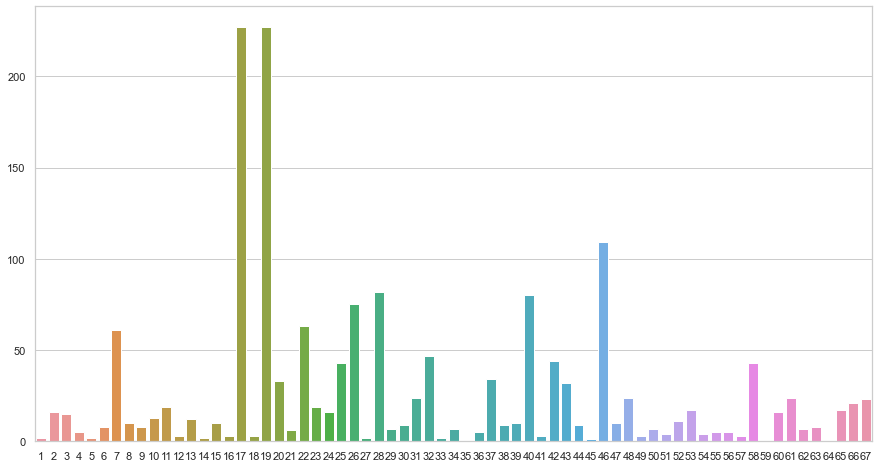

In [6]:
N_anom = []
for i in range(67):
    df = pd.read_csv("data/web traffic anomaly/A1Benchmark/real_"+str(i+1)+".csv")
    N_anom.append(sum(df['is_anomaly']))

plt.figure(figsize=(15,8))
sns.barplot(x=[i for i in range(1,68)], y=N_anom)

- Terlihat bahwa data yang memiliki anomali terbanyak adalah data ke 17 dan ke 19.
- Pada contoh ini kita coba gunakan data ke 17

In [7]:
df = pd.read_csv("data/web traffic anomaly/A1Benchmark/real_17.csv")
df.head()

,timestamp,value,is_anomaly
0,1,0,0
1,2,61,0
2,3,1495,0
3,4,1208,0
4,5,1347,0


- Kemudian coba kita plot datanya

<AxesSubplot:xlabel='timestamp', ylabel='value'>

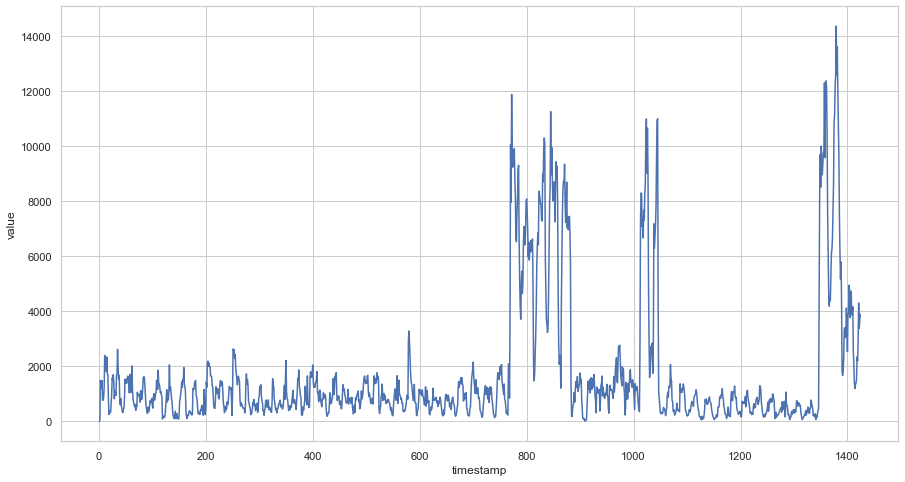

In [9]:
# Plot Data
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x='timestamp', y='value')

- Terlihat jelas bahwa range data cukup besar sehingga nanti kita akan lakukan **feature scalling** menggunakan **MinMaxScaler** agar range dari seluruh data tersebut berada di antara 0 dan 1
- Jika kita perhatikan seharusnya anomali terjadi pada interval timestamp sekitar [775,875], [1000,1050], dan [1350:]
- Mari kita plot juga anomali pada data tersebut.

Anomali pertama terjadi pada timestamp ke 769


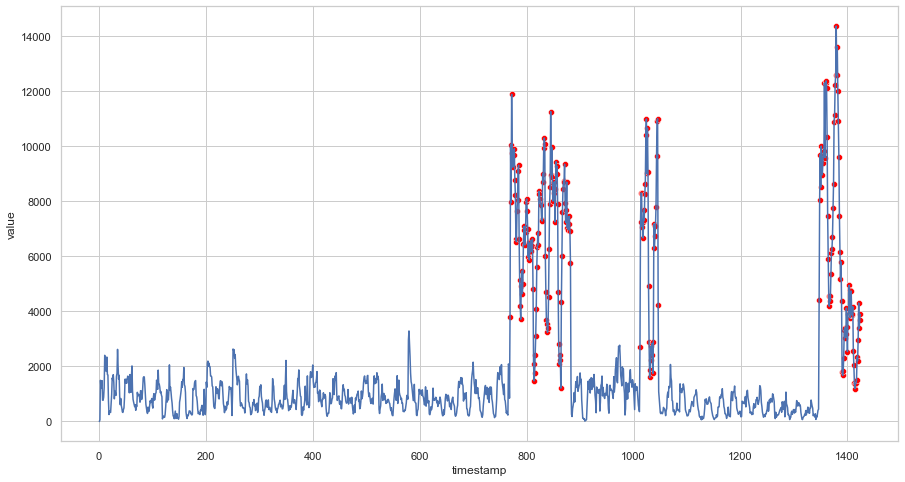

In [38]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df.loc[df['is_anomaly']==1],x='timestamp', y='value', color='red')
sns.lineplot(data=df,x='timestamp', y='value')
print('Anomali pertama terjadi pada timestamp ke', df.loc[df['is_anomaly']==1, 'timestamp'].values[0])

## Split Data
- Karena anomali pertama terjadi pada timestamp ke 769, maka kita akan gunakan data dengan timestamp < 769-30 (karena kita ingin menggunakan window size = 30) sebagai data train, dan sisanya sebagai data test

In [60]:
# split data
train = df[:738]
test = df[738:]

## Feature Scalling Menggunakan MinMaxScaler
- MinMaxScaler difit pada data train agar dapat digunakan kembali pada data test maupun data observasi baru.
- Hasil scalling disimpan pada kolom baru yaitu `'scaled'`

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train[['value']])

train['scaled'] = scaler.transform(train[['value']])
test['scaled'] = scaler.transform(test[['value']])

### Membuat model forecasting seperti sebelumnya

In [75]:
window_size = 30

X_train, y_train = sliding_window(train[['scaled']].values, window_size)
X_test, y_test = sliding_window(test[['scaled']].values, window_size)

# Early Stopping
es = EarlyStopping(monitor = 'val_loss', mode = "min", patience = 5, verbose = 0)

# create model
model = KerasRegressor(build_fn=create_model, epochs=50, validation_split=0.1, batch_size=32, callbacks=[es], verbose=1)

# define the grid search parameters
LSTM_unit = [64,128]
dropout=[0.1,0.2]
param_grid = dict(LSTM_unit=LSTM_unit, dropout=dropout)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv = 5)

grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/50
20/20 [==============================] - 2s 35ms/step - loss: 0.0329 - mae: 0.1410 - val_loss: 0.0215 - val_mae: 0.1172
Epoch 2/50
20/20 [==============================] - 0s 14ms/step - loss: 0.0217 - mae: 0.1105 - val_loss: 0.0171 - val_mae: 0.1079
Epoch 3/50
20/20 [==============================] - 0s 14ms/step - loss: 0.0187 - mae: 0.1041 - val_loss: 0.0152 - val_mae: 0.1015
Epoch 4/50
20/20 [==============================] - 0s 14ms/step - loss: 0.0170 - mae: 0.0986 - val_loss: 0.0136 - val_mae: 0.0961
Epoch 5/50
20/20 [==============================] - 0s 14ms/step - loss: 0.0170 - mae: 0.0983 - val_loss: 0.0118 - val_mae: 0.0899
Epoch 6/50
20/20 [==============================] - 0s 15ms/step - loss: 0.0151 - mae: 0.0914 - val_loss: 0.0104 - val_mae: 0.0851
Epoch 7/50
20/20 [==============================] - 0s 14ms/step - loss: 0.0135 - mae: 0.0870 - val_loss: 0.0086 - val_mae: 0.0760
Epoch 8/50
20/20 [==============================] - 0s 14ms/step - loss: 0.0131 - m

**Kemudian coba kita lihat grafik loss function MSE dan metric MAE terhadap epoch untuk melihat performa model terbaik kita dengan cara sebagai berikut**

In [76]:
history = grid_result.best_estimator_.model.history

Kita dapat melihat grafik loss function MSE dan metric MAE terhadap epoch untuk melihat performa model kita dengan cara sebagai berikut

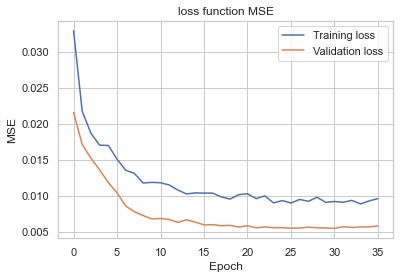

In [77]:
# grafik loss function MSE

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('loss function MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()

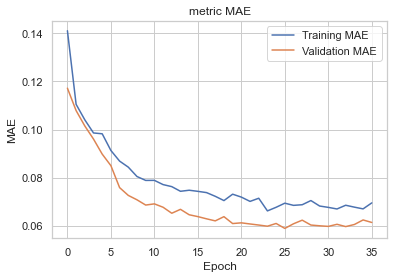

In [78]:
# grafik metric MAE

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('metric MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

### 7. Evaluasi Model

- Melakukan prediksi pada data train dan data test

In [79]:
best_model = grid_result.best_estimator_.model

In [80]:
# Prediksi data train
predict_train = scaler.inverse_transform(best_model.predict(X_train))
true_train = scaler.inverse_transform(y_train)

# Prediksi data test
predict_test = scaler.inverse_transform(best_model.predict(X_test))
true_test = scaler.inverse_transform(y_test)

- Setelah melakukan prediksi barulah kita melakukan evaluasi terhadap nilai prediksi tersebut menggunakan metric yang digunakan yaitu MAE

In [81]:
# Mean Absolute Error (MAE) data train
mae_train = np.mean(np.abs(true_train-predict_train))
print('MAE data train sebesar:', mae_train)

# Mean Absolute Error (MAE) test data
mae_test = np.mean(np.abs(true_test-predict_test))
print('MAE data test sebesar:', mae_test)

MAE data train sebesar: 205.90996969621733
MAE data test sebesar: 775.473806939474


**Melihat boxplot dari nilai error mutlak**

<AxesSubplot:>

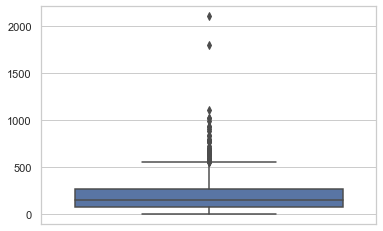

In [82]:
abs_error_train = np.abs(true_train-predict_train)
sns.boxplot(y=abs_error_train)

<AxesSubplot:>

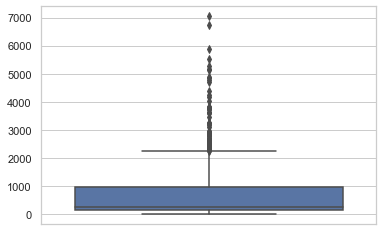

In [83]:
abs_error_test = np.abs(true_test-predict_test)
sns.boxplot(y=abs_error_test)

**Melihat range data**

## Plot prediksi data train

<AxesSubplot:xlabel='timestamp', ylabel='value'>

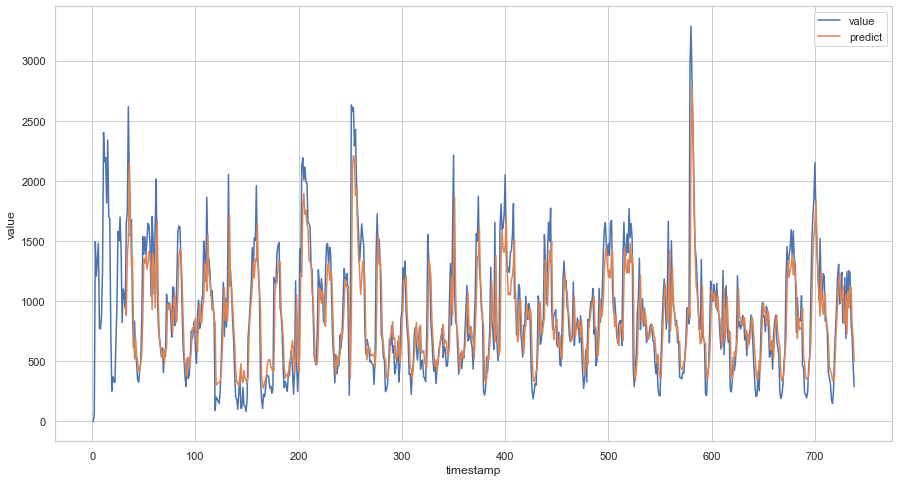

In [88]:
train['predict'] = np.nan
train['predict'][-len(y_train):] = predict_train[:,0]

plt.figure(figsize=(15,8))
sns.lineplot(x=train.timestamp, y=train.value, label = 'value')
sns.lineplot(x=train.timestamp, y=train.predict, label = 'predict')

## Plot prediksi data test

<AxesSubplot:xlabel='timestamp', ylabel='value'>

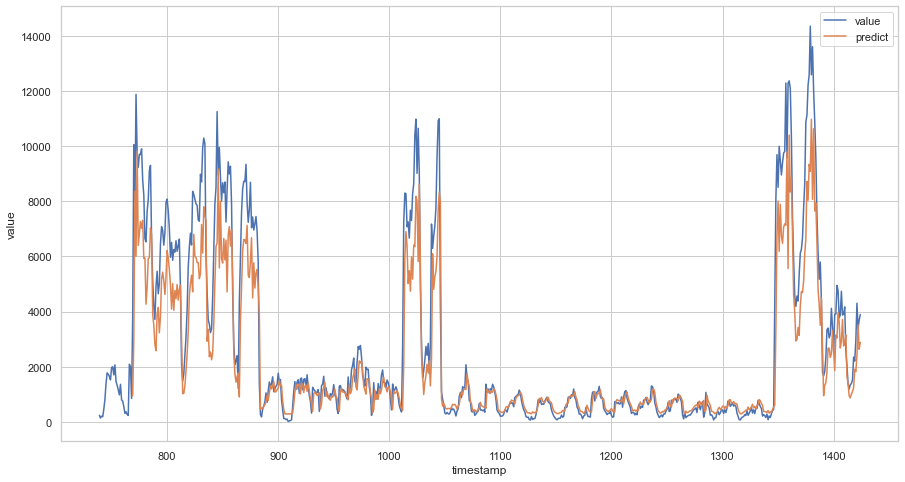

In [89]:
test['predict'] = np.nan
test['predict'][-len(y_test):] = predict_test[:,0]

plt.figure(figsize=(15,8))
sns.lineplot(x=test.timestamp, y=test.value, label = 'value')
sns.lineplot(x=test.timestamp, y=test.predict, label = 'predict')

In [87]:
N_anom_test = sum(test['is_anomaly'][window_size:])
N_anom_test

227

**Menentukan threshold**

threshold error mutlak: 477.132080078125


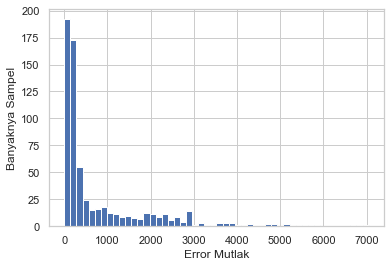

In [96]:
plt.hist(abs_error_test, bins=50)
plt.xlabel('Error Mutlak')
plt.ylabel('Banyaknya Sampel')

threshold = sorted(abs_error_test[:,0])[-N_anom_test]
print(f'threshold error mutlak: {threshold}')

In [97]:
test_anomaly = pd.DataFrame()
test_anomaly['timestamp'] = test['timestamp'][window_size:]
test_anomaly['value'] = test['value'][window_size:]
test_anomaly['abs_error'] = abs_error_test
test_anomaly['is_anomaly'] = test['is_anomaly'][window_size:]
test_anomaly['anomaly_hat'] = 0
test_anomaly.loc[test_anomaly['abs_error'] >= threshold, 'anomaly_hat'] = 1

test_anomaly.head(10)

,timestamp,value,abs_error,is_anomaly,anomaly_hat
768,769,3801,2857.401367,1,1
769,770,10052,7045.801758,1,1
770,771,7957,412.751953,1,0
771,772,11876,5872.497070,1,1
772,773,9763,50.368164,1,0
773,774,9234,2833.138184,1,1
774,775,9707,2863.108398,1,1
775,776,9691,2426.303711,1,1
776,777,9901,2878.879883,1,1
777,778,8766,1456.347656,1,1


In [98]:
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [99]:
# confusion matrix
matrix = confusion_matrix(test_anomaly['is_anomaly'], test_anomaly['anomaly_hat'])

# recall: tp / (tp + fn)
recall = recall_score(test_anomaly['is_anomaly'], test_anomaly['anomaly_hat'])

# ROC AUC
auc = roc_auc_score(test_anomaly['is_anomaly'], test_anomaly['anomaly_hat'])


print(matrix)
print('Sensitivity: %f' % recall)
print('ROC AUC: %f' % auc)

[[399  30]
 [ 30 197]]
Sensitivity: 0.867841
ROC AUC: 0.898956


In [101]:
anomalies_true = test_anomaly.loc[test_anomaly['is_anomaly'] == 1]
anomalies_pred = test_anomaly.loc[test_anomaly['anomaly_hat'] == 1]

In [104]:
# grafik data test beserta anomali
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=test_anomaly['timestamp'], y=test_anomaly['value'], name='value'))
fig.add_trace(go.Scatter(x=anomalies_true['timestamp'], y=anomalies_true['value'], mode='markers', name='Anomaly True'))
fig.add_trace(go.Scatter(x=anomalies_pred['timestamp'], y=anomalies_pred['value'], mode='markers', name='Anomaly Pred'))
fig.update_layout(showlegend=True, title='Detected anomalies')
fig.show()

In [ ]:
# untuk deployment anomaly detection

# save model
model.save('deployment/LSTM Anomaly Detection (Supervised)/anomaly_detection')

# save scaler
import pickle
pickle.dump(scaler2, open('deployment/LSTM Anomaly Detection (Supervised)/scaler.pkl', 'wb'))

# save test data
df2_test[['timestamp','value','is_anomaly']].to_csv('deployment/LSTM Anomaly Detection (Supervised)/data/real_19_test.csv')